In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Кластеризация

Наша задача - предсказать есть диабет у индивида или нет. В качестве таргета - колонка Diabetes. В нем три различных значения: `0`, `1`, `2`. `0` означает, что наблюдаемой здоров, `1` значит, что есть риск диабета, `2` означает наличие диабета. В качестве признаков будем использовать пол, количество лет в США, доход семьи и некоторые показатели, измеренные медицинскими работниками.  

**Задание 1.** В этой части ДЗ попробуем использовать кластеризацию как инструмент при проведении моделирования в задаче классификации

In [2]:
df = pd.read_csv('datahw21.csv', index_col='Unnamed: 0')

df.head()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


<Axes: >

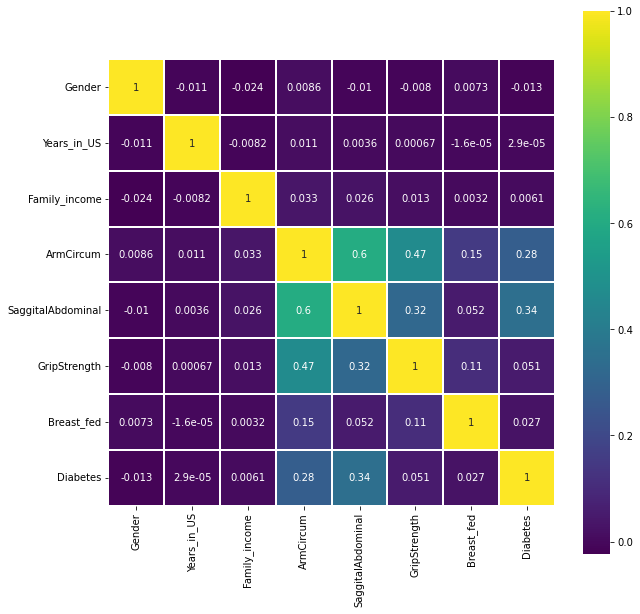

In [3]:
### Посмотрим как устроены данные
### Изобразим корреляционную матрицу

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [4]:
### Разделим выборку на трейн-тест

data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=1)

Для того, чтобы использовать K-means, лучше будет отнормировать данные. 

In [8]:
### Воспользуемся StandardScaler

### Your code is here
scaler = StandardScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Обучим K-Means с параметрами `n_clusters` = 3, `tol` = 0.0005. Выбор параметров обусловлен тем, что у нас три возможных значения таргета. Но в целом основной подход подбора количества кластеров - по кривой зависимости внутрикластерного и межкластерного расстояний от количества кластеров.

Установите `random_state` = 1

In [9]:
### Your code is here

km = KMeans(n_clusters=3, tol=0.0005, random_state=1)
km.fit(X_train_sc)

preds = km.predict(X_test_sc)

Посчитаем качество на изначальных данных(нормированных). Для этого обучите с дефолтными параметрами `RandomForestClassifier`, `LogisticRegression`, `LinearSVC`. Там, где нужно, установите `random_state` = 1. (1б)

In [12]:
### Your code is here
rf = RandomForestClassifier()
lr = LogisticRegression()
svm = LinearSVC()

rf.fit(X_train_sc, y_train)
y_pred_rf = rf.predict(X_test_sc)

print(f"RF acc: {round(accuracy_score(y_test, y_pred_rf), 3)}")

lr.fit(X_train_sc, y_train)
y_pred_lr = lr.predict(X_test_sc)

print(f"LR acc: {round(accuracy_score(y_test, y_pred_lr), 3)}")

svm.fit(X_train_sc, y_train)
y_pred_svm = svm.predict(X_test_sc)

print(f"SVM acc: {round(accuracy_score(y_test, y_pred_svm), 3)}")

RF acc: 0.887
LR acc: 0.888
SVM acc: 0.892


Добавьте в признаковое описание номер кластера и посчитайте качество с новым признаком! Стало ли качество хоть сколько-то лучше? (1б)

In [39]:
### Your code is here

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=1)
# Нормируем данные
scaler = StandardScaler()
X_train_scal = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scal = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Создаем класс для кластеризации
K_means = KMeans(n_clusters=3, tol=0.0005, random_state=1) 

# Получаем таблицу расстояний от объекта до цетнров разных кластеров, на нормированных данных
K_means.fit(X_train_scal)
km_train = K_means.predict(X_train_scal)
km_test = K_means.predict(X_test_scal)

X_train_scal_new = pd.concat([X_train_scal, pd.DataFrame(km_train, columns=['col'])], axis=1)
X_test_scal_new = pd.concat([X_test_scal, pd.DataFrame(km_test, columns=['col'])], axis=1)


rf = RandomForestClassifier(random_state=1)
lr = LogisticRegression(random_state=1)
SVC = LinearSVC(random_state=1)


rf.fit(X_train_scal_new, y_train)
lr.fit(X_train_scal_new, y_train)
SVC.fit(X_train_scal_new, y_train)


print(np.round(accuracy_score(y_test, rf.predict(X_test_scal_new)), 4))
print(np.round(accuracy_score(y_test, lr.predict(X_test_scal_new)), 4))
print(np.round(accuracy_score(y_test, SVC.predict(X_test_scal_new)), 4))


0.8888
0.8896
0.892


In [35]:
# X_train_scal_new = pd.concat([pd.DataFrame(X_train_scal, columns=X_train.columns), pd.DataFrame(km_train, columns=['km_0', 'km_1', 'km_2'])], axis=1)
# X_test_scal_new = pd.concat([pd.DataFrame(X_test_scal, columns=X_test.columns), pd.DataFrame(km_test, columns=['km_0', 'km_1', 'km_2'])], axis=1)

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,km
0,-1.017409,-0.198311,-0.311557,0.380926,-0.823248,0.282705,0.388951,1
1,0.982889,-0.198311,0.037744,0.057088,-0.306067,-1.259208,0.388951,1
2,-1.017409,-0.198311,-0.599577,-0.538774,-0.964298,-0.280860,0.388951,1
3,0.982889,-0.198311,-0.446375,0.419786,-0.705707,-0.226757,0.388951,1
4,0.982889,-0.198311,1.686197,0.251391,-0.165018,-0.366521,0.388951,1
...,...,...,...,...,...,...,...,...
7354,-1.017409,-0.198311,0.423813,0.095948,-0.799740,-0.483743,0.388951,1
7355,0.982889,-0.198311,-1.169488,-0.318564,-1.293413,-0.736220,0.388951,1
7356,0.982889,-0.198311,0.932443,0.406833,-0.635182,0.652404,0.388951,1
7357,-1.017409,-0.198311,-0.856956,-1.341892,-0.070985,-0.100519,-2.571018,0


In [ ]:
preds

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [32]:
km_train

array([1, 1, 1, ..., 1, 0, 2], dtype=int32)

In [28]:
pd.DataFrame(km_train, columns=['km_0', 'km_1', 'km_2'])

,km_0,km_1,km_2
0,3.355893,1.648158,2.085848
1,3.309770,1.448972,2.635365
2,3.286145,1.270095,2.787660
3,3.307981,1.506764,2.162019
4,3.625798,2.179240,2.518939
...,...,...,...
7354,3.268749,1.333600,2.445908
7355,3.547962,1.738113,3.244026
7356,3.533012,2.033478,2.039357
7357,1.638542,3.388729,4.141679


In [27]:
pd.DataFrame(X_train_scal, columns=X_train.columns)

,0,1,2,3,4,5,6
0,-1.017409,-0.198311,-0.311557,0.380926,-0.823248,0.282705,0.388951
1,0.982889,-0.198311,0.037744,0.057088,-0.306067,-1.259208,0.388951
2,-1.017409,-0.198311,-0.599577,-0.538774,-0.964298,-0.280860,0.388951
3,0.982889,-0.198311,-0.446375,0.419786,-0.705707,-0.226757,0.388951
4,0.982889,-0.198311,1.686197,0.251391,-0.165018,-0.366521,0.388951
...,...,...,...,...,...,...,...
7354,-1.017409,-0.198311,0.423813,0.095948,-0.799740,-0.483743,0.388951
7355,0.982889,-0.198311,-1.169488,-0.318564,-1.293413,-0.736220,0.388951
7356,0.982889,-0.198311,0.932443,0.406833,-0.635182,0.652404,0.388951
7357,-1.017409,-0.198311,-0.856956,-1.341892,-0.070985,-0.100519,-2.571018


In [29]:
pd.concat([pd.DataFrame(X_train_scal, columns=X_train.columns), pd.DataFrame(km_train, columns=['km_0', 'km_1', 'km_2'])], axis=1)

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,km_0,km_1,km_2
0,-1.017409,-0.198311,-0.311557,0.380926,-0.823248,0.282705,0.388951,3.355893,1.648158,2.085848
1,0.982889,-0.198311,0.037744,0.057088,-0.306067,-1.259208,0.388951,3.309770,1.448972,2.635365
2,-1.017409,-0.198311,-0.599577,-0.538774,-0.964298,-0.280860,0.388951,3.286145,1.270095,2.787660
3,0.982889,-0.198311,-0.446375,0.419786,-0.705707,-0.226757,0.388951,3.307981,1.506764,2.162019
4,0.982889,-0.198311,1.686197,0.251391,-0.165018,-0.366521,0.388951,3.625798,2.179240,2.518939
...,...,...,...,...,...,...,...,...,...,...
7354,-1.017409,-0.198311,0.423813,0.095948,-0.799740,-0.483743,0.388951,3.268749,1.333600,2.445908
7355,0.982889,-0.198311,-1.169488,-0.318564,-1.293413,-0.736220,0.388951,3.547962,1.738113,3.244026
7356,0.982889,-0.198311,0.932443,0.406833,-0.635182,0.652404,0.388951,3.533012,2.033478,2.039357
7357,-1.017409,-0.198311,-0.856956,-1.341892,-0.070985,-0.100519,-2.571018,1.638542,3.388729,4.141679


Посчитаем расстояния от объектов до центров кластеров. Для этого воспользуемся методом `transform` обученного класса kmeans.

Обучим и посчитаем метрики исключительно на расстояниях до центра. Убедимся, что такой подход имеет право на существование, если данные позволяют, то качество не сильно должно пострадать. А в каких-то случаях может оказаться даже лучше! Таким образом можно снижать размерность данных. (2б)

In [40]:
### Your code is here


X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=1)
# Нормируем данные
scaler = StandardScaler()
X_train_scal = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scal = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Создаем класс для кластеризации
K_means = KMeans(n_clusters=3, tol=0.0005, random_state=1) 

# Получаем таблицу расстояний от объекта до цетнров разных кластеров, на нормированных данных
K_means.fit(X_train_scal)
km_train = pd.DataFrame(K_means.transform(X_train_scal), columns=['km_0', 'km_1', 'km_2'])
km_test = pd.DataFrame(K_means.transform(X_test_scal), columns=['km_0', 'km_1', 'km_2'])

# X_train_scal_new = pd.concat([X_train_scal, pd.DataFrame(km_train, columns=['col'])], axis=1)
# X_test_scal_new = pd.concat([X_test_scal, pd.DataFrame(km_test, columns=['col'])], axis=1)


rf = RandomForestClassifier(random_state=1)
lr = LogisticRegression(random_state=1)
SVC = LinearSVC(random_state=1)


rf.fit(km_train, y_train)
lr.fit(km_train, y_train)
SVC.fit(km_train, y_train)


print(np.round(accuracy_score(y_test, rf.predict(km_test)), 4))
print(np.round(accuracy_score(y_test, lr.predict(km_test)), 4))
print(np.round(accuracy_score(y_test, SVC.predict(km_test)), 4))

0.8835
0.892
0.892
